In [229]:
%run Libraries.ipynb

In [230]:
train_original=pd.read_csv("train.csv")
train=train_original.copy()
test_original=pd.read_csv("test.csv")
test=test_original.copy()

In [231]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
train.head(1) # there are a lot of columns that have srings ( and dictionaries within them). Wil have to think how to fix them

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [232]:
train['belongs_to_collection'][0] # this is a string

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [233]:
train.shape, test.shape

((3000, 23), (4398, 22))

In [234]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [235]:
def text_to_dic(df,columns):
    for column in columns:
        df[column]=df[column].apply(lambda x:{} if pd.isnull(x) else ast.literal_eval(x))
    return df

In [236]:
train=text_to_dic(train,dict_columns)
test=text_to_dic(test,dict_columns)

In [237]:
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


### belongs_to_collection

In [238]:
for i, value in enumerate(train[dict_columns[0]][0:4]):
    print(i,value)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}


In [239]:
#to get the Collection name
train[dict_columns[0]][0][0]['name']

'Hot Tub Time Machine Collection'

In [240]:
train['collection_name']=train['belongs_to_collection'].apply(lambda x:x[0]['name'] if x!={} else 0)
train['has_collection_name']=train['belongs_to_collection'].apply(lambda x:0 if x=={} else 1)
#delete the original column
train.drop(['belongs_to_collection','collection_name'],axis=1,inplace=True)

In [241]:
train['has_collection_name'].value_counts()

0    2396
1     604
Name: has_collection_name, dtype: int64

In [242]:
test['collection_name']=test['belongs_to_collection'].apply(lambda x:x[0]['name'] if x!={} else 0)
test['has_collection_name']=test['belongs_to_collection'].apply(lambda x:0 if x=={} else 1)
#delete the original column
test.drop(['belongs_to_collection','collection_name'],axis=1,inplace=True)

### genres

In [243]:
for i, e in enumerate(train['genres'][:5]):#lets extract the name from here
    print(i, e) 

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [244]:
train['genres']=train['genres'].apply(lambda x: [i['name'] for i in x] if x!={} else [])
train['genre_count']=train['genres'].apply(lambda x: len(x) if x!={} else 0)
#test
test['genres']=test['genres'].apply(lambda x: [i['name'] for i in x] if x!={} else [])
test['genre_count']=test['genres'].apply(lambda x: len(x) if x!={} else 0)

In [245]:
train['genre_count'].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genre_count, dtype: int64

### Word Cloud of all Genres

In [246]:
list_of_genres=[i for i in train['genres']]

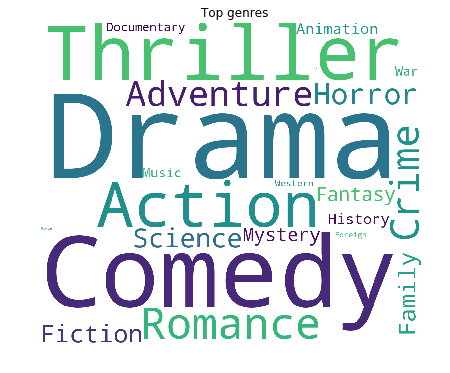

In [247]:
plt.figure(figsize = (10, 6))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

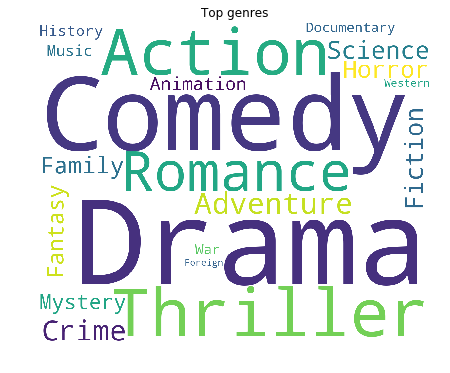

In [248]:
list_of_genres_test=[i for i in test['genres']]
plt.figure(figsize = (10, 6))
text = ' '.join([i for j in list_of_genres_test for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [249]:
# from the Word Cloud it seems both train and test are similar at least wrt genres

In [250]:
# I want to create Binary columns for each genre if We should not have too many genres in data ( sicne only 3000 rows)
#Curse of Dimensionality
#lets check how mnay unique genres are present in data
all_genres=set()
for i in list_of_genres:
    all_genres=all_genres.union(i)

In [251]:
all_genres # there are 20 of them. I will prefer to not USE Binary columns ( Dummies) for these many genres.But lets see
#we can decide later
#instead I will use some kind of encoding. May be Target Encoding ( taking average of the target variable)
#But then which average to take, the Highest or the lowest since, each movie has multiple Genres?

#or Frequency Encoding, so taking the count of number of times these genre appear in the training data. But this has a problem
#A movie can have multiple genre. So what frequncy to take the Highest or the lowest?

#Lets check if the test data also has these genres and not any new

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [252]:
all_genres_test=set()
for i in list_of_genres_test:
    all_genres_test=all_genres_test.union(i)
print(all_genres_test),print(len(all_genres_test))

{'Foreign', 'Horror', 'Music', 'History', 'Mystery', 'Adventure', 'Family', 'Action', 'Animation', 'Crime', 'Fantasy', 'Romance', 'Documentary', 'Western', 'Science Fiction', 'Comedy', 'Drama', 'Thriller', 'War'}
19


(None, None)

In [253]:
[i for i in all_genres_test if i not in all_genres] #no new genres in test

[]

In [254]:
Counter([i for j in list_of_genres for i in j]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [255]:
#we will exclude the TV Movie genre as it has only 1 mrecord
most_common_genre=Counter([i for j in list_of_genres for i in j]).most_common(15)

In [256]:
for genre in most_common_genre:
    train['genre_'+genre[0]]=train['genres'].apply(lambda x: 1 if genre[0] in x else 0)
    test['genre_'+genre[0]]=test['genres'].apply(lambda x: 1 if genre[0] in x else 0)
    
#drop genre colum

train.drop('genres',axis=1,inplace=True)
test.drop('genres',axis=1,inplace=True)

### production_companies

In [257]:
for i in train['production_companies'][0:4]:
    print(i)

[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
[{'name': 'Walt Disney Pictures', 'id': 2}]
[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
{}


In [258]:
train['production_cos']=train['production_companies'].apply(lambda x :[i['name']  for i in x] if x!={} else [] )
test['production_cos']=test['production_companies'].apply(lambda x :[i['name']  for i in x] if x!={} else [] )
#take the count
train['Count_production_cos']=train['production_cos'].apply( lambda x: 0 if x==[] else len(x) )
test['Count_production_cos']=test['production_cos'].apply( lambda x: 0 if x==[] else len(x) )

In [259]:
train['Count_production_cos'].value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: Count_production_cos, dtype: int64

In [260]:
#lets create binary columns for th top 10 most occuring production firms
most_common_production_cos=Counter([i for j in train['production_cos'] for i in j]).most_common(10)

In [261]:
for i in most_common_production_cos:
    train['Prod_cos_'+i[0]]=train['production_cos'].apply(lambda x: 1 if i[0] in x else 0)
    test['Prod_cos_'+i[0]]=test['production_cos'].apply(lambda x: 1 if i[0] in x else 0)

In [262]:
train.drop(['production_companies','production_cos'],axis=1,inplace=True)
test.drop(['production_companies','production_cos'],axis=1,inplace=True)

### production_countries

In [263]:
for i in train['production_countries'][18:20]:
    print(i)

[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
[{'iso_3166_1': 'FR', 'name': 'France'}]


In [264]:
train['prod_countries']=train['production_countries'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
test['prod_countries']=test['production_countries'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
train['prod_country_count']=train['production_countries'].apply(lambda x:0 if x=={} else len(x))
test['prod_country_count']=test['production_countries'].apply(lambda x:0 if x=={} else len(x))

In [265]:
most_common_production_countries=Counter([i for j in train['prod_countries'] for i in j]).most_common(10) #take top 10 countries

In [266]:
for i in most_common_production_countries:
    train['prod_country_'+i[0]]=train['prod_countries'].apply(lambda x:1 if i[0] in x else 0)
    test['prod_country_'+i[0]]=test['prod_countries'].apply(lambda x:1 if i[0] in x else 0)

In [267]:
train.drop(['production_countries','prod_countries'],axis=1,inplace=True)
test.drop(['production_countries','prod_countries'],axis=1,inplace=True)

### Spoken languages

In [268]:
train['Language']=train['spoken_languages'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
test['Language']=test['spoken_languages'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
#count
train['Count_Language']=train['Language'].apply(lambda x:len(x) if x!={} else 0)
test['Count_Language']=test['spoken_languages'].apply(lambda x:len(x) if x!={} else 0)

In [269]:
train['Count_Language'].value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: Count_Language, dtype: int64

In [270]:
most_common_languages=Counter([i for j in train['Language'] for i in j]).most_common(9) 
# notice this ('', 47) and ('No Language', 7)

In [271]:
for i in most_common_languages:
    train['Language_'+i[0]]=train['Language'].apply(lambda x: 1 if i[0] in x else 0)
    test['Language_'+i[0]]=test['Language'].apply(lambda x: 1 if i[0] in x else 0)

In [272]:
train.drop(['spoken_languages','Language'],axis=1,inplace=True)
test.drop(['spoken_languages','Language'],axis=1,inplace=True)

### Keywords

In [273]:
for i, e in enumerate(train['Keywords'][:4]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [274]:
train['Keywords']=train['Keywords'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
test['Keywords']=test['Keywords'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
#count
train['Count_Keywords']=train['Keywords'].apply(lambda x:len(x) if x!={} else 0)
test['Count_Keywords']=test['Keywords'].apply(lambda x:len(x) if x!={} else 0)

In [275]:
train['Count_Keywords'].value_counts().head(10) 

5    293
0    276
4    248
3    228
6    227
2    207
7    192
1    187
8    161
9    134
Name: Count_Keywords, dtype: int64

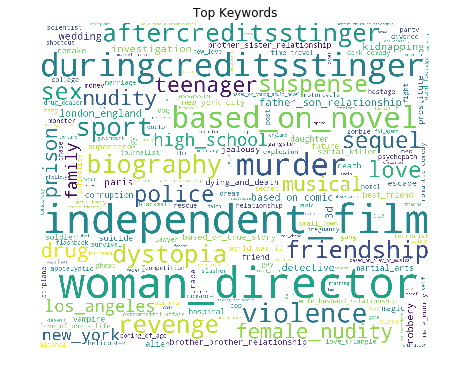

In [276]:
list_of_Keywords_train=[i for i in train['Keywords']]
plt.figure(figsize = (10, 6))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_Keywords_train for i in j]) 
#Since keywords for the same records may have spaces, added a _ to avoid mixing them with words from other records
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top Keywords')
plt.axis("off")
plt.show()

In [277]:
most_common_Keywords=Counter([i for j in train['Keywords'] for i in j]).most_common(10) 

In [278]:
for i in most_common_Keywords:
    train['Keywords_'+i[0]]=train['Keywords'].apply(lambda x:1 if i[0] in x else 0)
    test['Keywords_'+i[0]]=test['Keywords'].apply(lambda x:1 if i[0] in x else 0)

In [279]:
train.drop('Keywords',axis=1,inplace=True)
test.drop('Keywords',axis=1,inplace=True)

### cast

In [280]:
for i, e in enumerate(train['cast'][3:4]):
    print(i, e)

0 [{'cast_id': 1, 'character': 'Vidya Bagchi', 'credit_id': '52fe48779251416c9108d6d9', 'gender': 1, 'id': 35068, 'name': 'Vidya Balan', 'order': 0, 'profile_path': '/anMmmqKY11jcm0UnSSakfNOSCyB.jpg'}, {'cast_id': 5, 'character': '', 'credit_id': '57722abec3a368245b004519', 'gender': 2, 'id': 85047, 'name': 'Nawazuddin Siddiqui', 'order': 1, 'profile_path': '/2Kv2ENAs1ETAFTQ6mC1jbDzEzIN.jpg'}, {'cast_id': 6, 'character': '', 'credit_id': '57722aea9251411dca003f8f', 'gender': 0, 'id': 1021524, 'name': 'Parambrata Chatterjee', 'order': 2, 'profile_path': '/Aif4X9ihmRrVzX1cbWDDznk8HZV.jpg'}, {'cast_id': 7, 'character': '', 'credit_id': '57722b069251411dcd003f73', 'gender': 0, 'id': 1093644, 'name': 'Saswata Chatterjee', 'order': 3, 'profile_path': '/vuHaLzSVRIo7pXSmhB7ko6YmNs.jpg'}, {'cast_id': 8, 'character': '', 'credit_id': '57722b26c3a36869a2000745', 'gender': 0, 'id': 86033, 'name': 'Indraneil Sengupta', 'order': 4, 'profile_path': '/4hLg7XIJdhrS3t0h5Q8vQxnp4DZ.jpg'}, {'cast_id': 9, 

In [281]:
train['Cast_name']=train['cast'].apply(lambda x:[i['name'] for i in x] if x!={} else [])
test['Cast_name']=test['cast'].apply(lambda x:[i['name'] for i in x] if x!={} else [])

In [282]:
#count cast
train['Cast_count']=train['Cast_name'].apply(lambda x:0 if x==[] else len(x))
test['Cast_count']=test['Cast_name'].apply(lambda x:0 if x==[] else len(x))

In [283]:
train['Cast_count'].value_counts().head(10)

15    212
16    165
10    135
13    129
12    124
11    122
9     118
17    118
18    115
14    110
Name: Cast_count, dtype: int64

In [284]:
Counter([i for j in train['Cast_name'] for i in j]).most_common(15)
#we can create new columns ( binary) if the records have any of these top Stars.

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

In [285]:
train['Cast_name'].head()

0    [Rob Corddry, Craig Robinson, Clark Duke, Adam...
1    [Anne Hathaway, Julie Andrews, H√©ctor Elizond...
2    [Miles Teller, J.K. Simmons, Melissa Benoist, ...
3    [Vidya Balan, Nawazuddin Siddiqui, Parambrata ...
4    [Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...
Name: Cast_name, dtype: object

In [286]:
most_common_Cast_names=Counter([i for j in train['Cast_name'] for i in j]).most_common(15)
for i in most_common_Cast_names:
    train['Cast_names_'+i[0]]=train['Cast_name'].apply(lambda x: 1 if i[0] in x else 0)
    test['Cast_names_'+i[0]]=test['Cast_name'].apply(lambda x: 1 if i[0] in x else 0)

In [287]:
#gender in cast
# gender of all the cast is not important. I wanted to check if the actor in lead role is male or female But there is no
#way to get this info. We can however have a count of #of male, #of Female and #of Unasigned gender as 3 column in the data
train['Cast_gender']=train['cast'].apply(lambda x:[i['gender'] for i in x]if x !=[] else [0]) #male 2,Female 1 & 0 is Unassigned
test['Cast_gender']=test['cast'].apply(lambda x:[i['gender'] for i in x] if x !=[] else [0])

In [288]:
Counter([i for j in train['Cast_gender'] for i in j]).most_common()

[(2, 27949), (0, 20342), (1, 13533)]

In [289]:
train['Cast_male_2']=train['Cast_gender'].apply(lambda x:sum([i==2 for i in x]) if x!=[] else 0)
train['Cast_female_1']=train['Cast_gender'].apply(lambda x:sum([i==1 for i in x]) if x!=[] else 0)
train['Cast_gender_UnAss0']=train['Cast_gender'].apply(lambda x:sum([i==0 for i in x]) if x!=[] else 0)

#for test

test['Cast_male_2']=test['Cast_gender'].apply(lambda x:sum([i==2 for i in x]) if x!=[] else 0)
test['Cast_female_1']=test['Cast_gender'].apply(lambda x:sum([i==1 for i in x]) if x!=[] else 0)
test['Cast_gender_UnAss0']=test['Cast_gender'].apply(lambda x:sum([i==0 for i in x]) if x!=[] else 0)

In [290]:
train.drop(['cast','Cast_name','Cast_gender'],axis=1,inplace=True)
test.drop(['cast','Cast_name','Cast_gender'],axis=1,inplace=True)

### crew

In [291]:
train['crew'][0][0],train['crew'][0][1]#etc
#we will extract the Total Male Crew Count, Total Female Crew Count
# we will ignore the Actual name and the JOBs

({'credit_id': '59ac067c92514107af02c8c8',
  'department': 'Directing',
  'gender': 0,
  'id': 1449071,
  'job': 'First Assistant Director',
  'name': 'Kelly Cantley',
  'profile_path': None},
 {'credit_id': '52fe4ee7c3a36847f82afad7',
  'department': 'Directing',
  'gender': 2,
  'id': 3227,
  'job': 'Director',
  'name': 'Steve Pink',
  'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'})

In [292]:
train['crew_gender']=train['crew'].apply(lambda x:[i['gender'] for i in x] if x!={} else [])
test['crew_gender']=test['crew'].apply(lambda x:[i['gender'] for i in x] if x!={} else [])

In [293]:
train['crew_gender_0']=train['crew_gender'].apply(lambda x:sum([i==0 for i in x]) if x!=[] else 0)
train['crew_gender_1']=train['crew_gender'].apply(lambda x:sum([i==1 for i in x]) if x!=[] else 0)
train['crew_gender_2']=train['crew_gender'].apply(lambda x:sum([i==2 for i in x]) if x!=[] else 0)
test['crew_gender_0']=test['crew_gender'].apply(lambda x:sum([i==0 for i in x]) if x!=[] else 0)
test['crew_gender_1']=test['crew_gender'].apply(lambda x:sum([i==1 for i in x]) if x!=[] else 0)
test['crew_gender_2']=test['crew_gender'].apply(lambda x:sum([i==2 for i in x]) if x!=[] else 0)

In [294]:
train.drop(['crew','crew_gender'],axis=1,inplace=True)
test.drop(['crew','crew_gender'],axis=1,inplace=True)

In [295]:
train.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,has_collection_name,genre_count,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,Count_production_cos,Prod_cos_Warner Bros.,Prod_cos_Universal Pictures,Prod_cos_Paramount Pictures,Prod_cos_Twentieth Century Fox Film Corporation,Prod_cos_Columbia Pictures,Prod_cos_Metro-Goldwyn-Mayer (MGM),Prod_cos_New Line Cinema,Prod_cos_Touchstone Pictures,Prod_cos_Walt Disney Pictures,Prod_cos_Columbia Pictures Corporation,prod_country_count,prod_country_United States of America,prod_country_United Kingdom,prod_country_France,prod_country_Germany,prod_country_Canada,prod_country_India,prod_country_Italy,prod_country_Japan,prod_country_Australia,prod_country_Russia,Count_Language,Language_English,Language_Français,Language_Español,Language_Deutsch,Language_Pусский,Language_Italiano,Language_日本語,Language_普通话,Language_हिन्दी,Count_Keywords,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_dystopia,Cast_count,Cast_names_Samuel L. Jackson,Cast_names_Robert De Niro,Cast_names_Morgan Freeman,Cast_names_J.K. Simmons,Cast_names_Bruce Willis,Cast_names_Liam Neeson,Cast_names_Susan Sarandon,Cast_names_Bruce McGill,Cast_names_John Turturro,Cast_names_Forest Whitaker,Cast_names_Willem Dafoe,Cast_names_Bill Murray,Cast_names_Owen Wilson,Cast_names_Nicolas Cage,Cast_names_Sylvester Stallone,Cast_male_2,Cast_female_1,Cast_gender_UnAss0,crew_gender_0,crew_gender_1,crew_gender_2
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,8,6,59,0,13
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,1,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,0,1,4,4


## Data Exploration

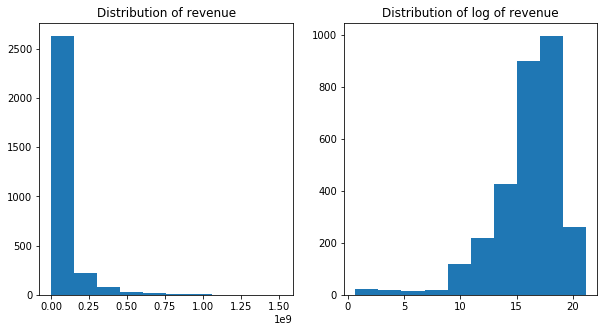

In [296]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']));
plt.title('Distribution of log of revenue');

In [297]:
train['log_revenue'] = np.log1p(train['revenue'])

#### Budget

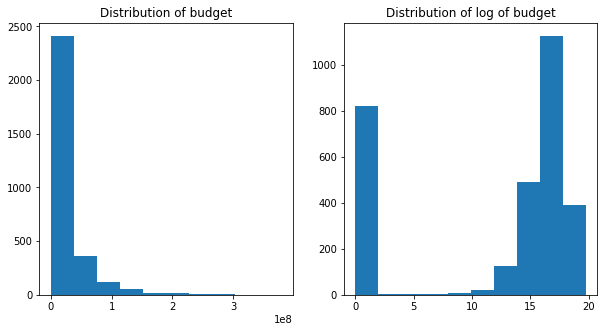

In [298]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(train['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']));
plt.title('Distribution of log of budget');

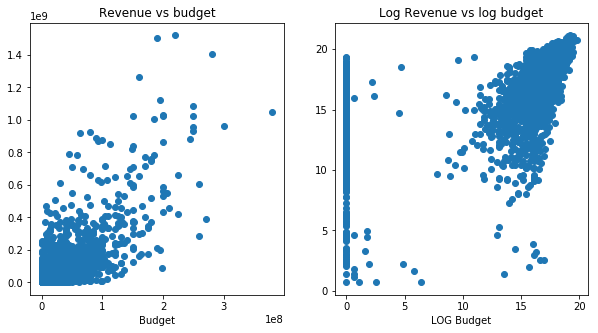

In [299]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(train['budget'], train['revenue'])
plt.xlabel("Budget")
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget']), train['log_revenue'])
plt.xlabel("LOG Budget")
plt.title('Log Revenue vs log budget');

In [300]:
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

In [301]:
np.corrcoef(train['budget'],train['revenue'])

array([[1.        , 0.75296451],
       [0.75296451, 1.        ]])

#### Homepage

In [302]:
train['homepage'].value_counts().head() #most of them are unique

http://www.transformersmovie.com/          4
http://www.lordoftherings.net/             2
http://www.thehobbit.com/                  2
https://www.facebook.com/DeadLandsMovie    1
http://www.newintownmovie.com/             1
Name: homepage, dtype: int64

In [303]:
#since there are nulls, lets create a binary to mark 1 /0 corrosponding to if Homepage is present or not
train['has_homepage'] = 1
train.loc[train['homepage'].isnull(),'has_homepage']=0
test['has_homepage'] = 1
test.loc[test['homepage'].isnull(),'has_homepage']=0

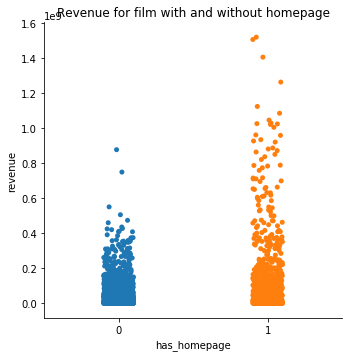

In [304]:
import seaborn as sns
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for film with and without homepage');

### original_language

In [305]:
train['original_language'].value_counts().head(10)

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
Name: original_language, dtype: int64

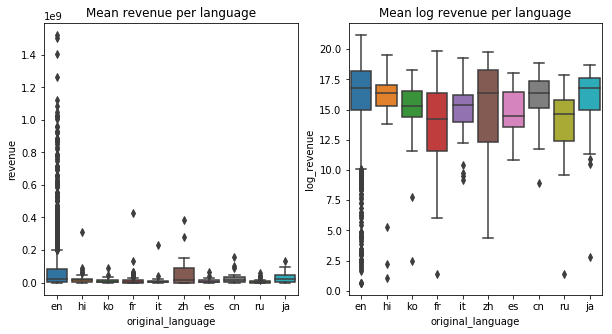

In [306]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

#### original_title

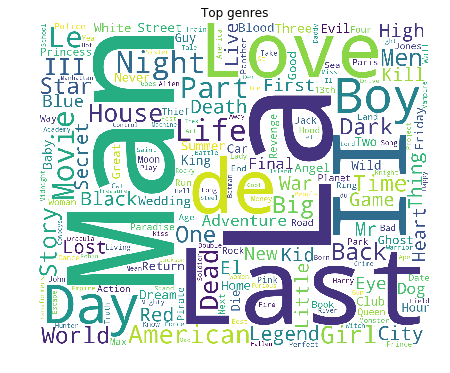

In [307]:
#Original title ahs the title of the movie. This may not make sense for non english movies and i doubt if this will be 
#useful for the Model. However lets just take a look at the word cloud
plt.figure(figsize = (10, 6))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

#### overview

In [308]:
train['overview'][0]#Overall summary of the movie. This can be used to draw a word cloud

'When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.'

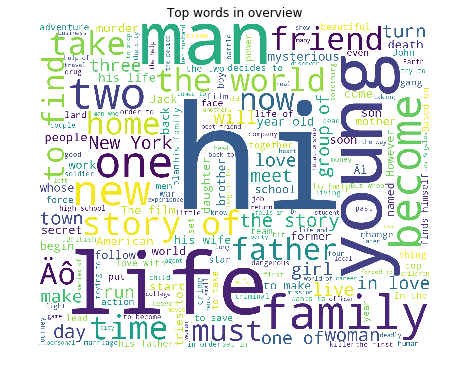

In [309]:
plt.figure(figsize = (10, 6))
text = ' '.join(train['overview'].fillna('').values) #this has 14 missing values
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

#### popularity

In [310]:
train['popularity'].describe()# this looks weird and is not on the same scale. 

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

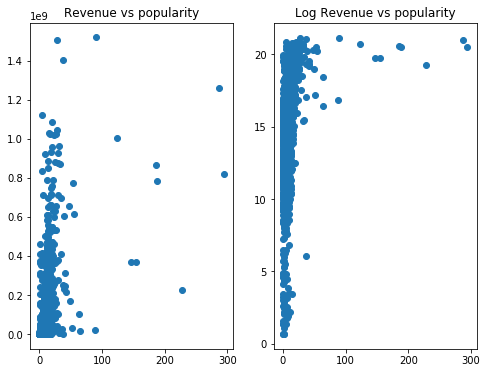

In [311]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.scatter(train['popularity'], train['revenue'])
plt.title('Revenue vs popularity');
plt.subplot(1, 2, 2)
plt.scatter(train['popularity'], train['log_revenue'])
plt.title('Log Revenue vs popularity');

In [312]:
np.corrcoef(train['popularity'],train['revenue'])#poor corelation

array([[1.        , 0.46146029],
       [0.46146029, 1.        ]])

In [313]:
train['release_date'].isnull().sum(),test['release_date'].isnull().sum()#test has one null

(0, 1)

In [314]:
test.loc[test['release_date'].isnull(),'release_date']='01/01/98' #since just one record, donot worry much

In [315]:
train['release_date'].head(5)# the dates are given in 2 numbers. 

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [316]:
def fix_date(x):
    """
    fix dates
    """
    year=x.split('/')[2]
    if int(year)<20:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
    
train['release_date']=train['release_date'].apply(lambda x:fix_date(x))  
test['release_date']=test['release_date'].apply(lambda x:fix_date(x))

In [317]:
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [318]:
def process_date(df):
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    
    return df

train = process_date(train)
test = process_date(test)

In [319]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = test['release_date_year'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]
layout = go.Layout(dict(title = "Number of films per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [320]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].sum()
data = [go.Scatter(x=d1.index, y=d1.values, name='film count'), go.Scatter(x=d2.index, y=d2.values, name='total revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Number of films and total revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Total revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [321]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].mean()
data = [go.Scatter(x=d1.index, y=d1.values, name='film count'), go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

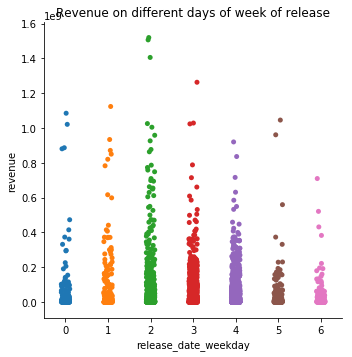

In [322]:
sns.catplot(x='release_date_weekday', y='revenue', data=train);
plt.title('Revenue on different days of week of release');

In [323]:
#Surprisingly films releases on Wednesdays and on Thursdays tend to have a higher revenue.
train.drop('release_date',axis=1,inplace=True)
test.drop('release_date',axis=1,inplace=True)

#### runtime

In [324]:
train['runtime'].fillna(value=train['runtime'].mean(),inplace=True)
test['runtime'].fillna(value=train['runtime'].mean(),inplace=True)

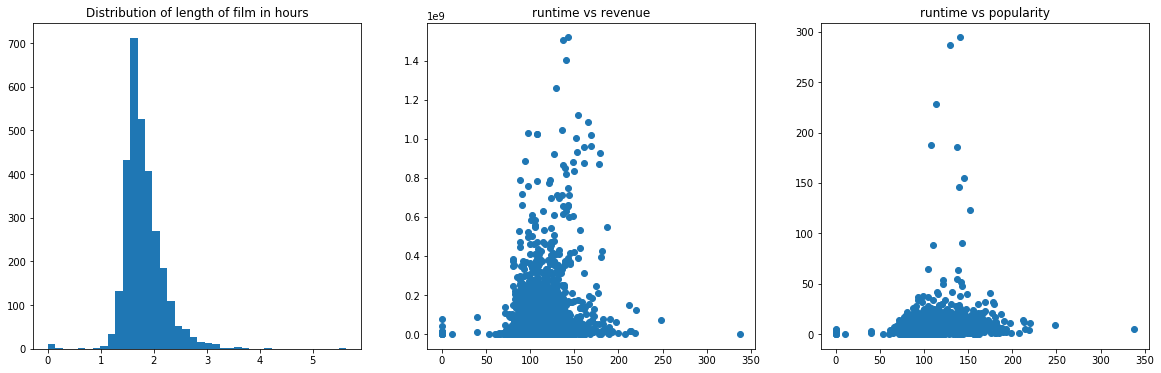

In [325]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(train['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(train['runtime'].fillna(0), train['revenue'])
plt.title('runtime vs revenue');
plt.subplot(1, 3, 3)
plt.scatter(train['runtime'].fillna(0), train['popularity'])
plt.title('runtime vs popularity');

#### Status

In [326]:
train['status'].value_counts() #we can ignore this variable

Released    2996
Rumored        4
Name: status, dtype: int64

#### tagline

In [327]:
train['tagline'].value_counts()#all are unique. Can be ignored

Based on a true story.                                                           3
Who is John Galt?                                                                2
Crime pays... just not enough                                                    1
The boys are back in town.                                                       1
When the streets are a jungle... There can only be one king.                     1
                                                                                ..
The hopes of a nation rode on a long shot.                                       1
Not all surgery is intended to cure.                                             1
A Breath Of Fresh Vintage Air                                                    1
Credit-grabbing, back-stabbing, wife-nabbing. Just another day at the office.    1
He doesn't just talk to the animals!                                             1
Name: tagline, Length: 2400, dtype: int64

#### Collections

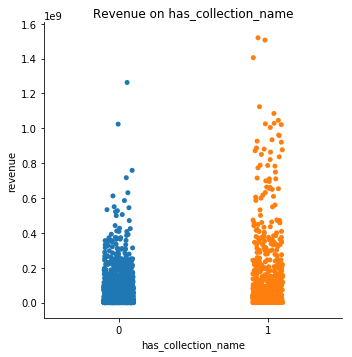

In [328]:
sns.catplot(x='has_collection_name', y='revenue', data=train);
plt.title('Revenue on has_collection_name');#having a collection name has a enefit. Example Batman series, Krish 1,2 3 etc

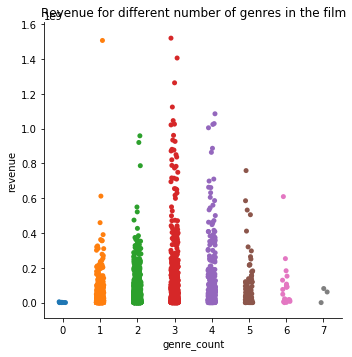

In [329]:
sns.catplot(x='genre_count', y='revenue', data=train);
plt.title('Revenue for different number of genres in the film');

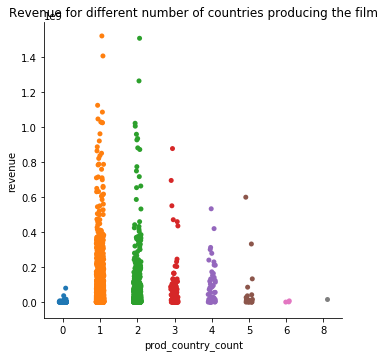

In [330]:
sns.catplot(x='prod_country_count', y='revenue', data=train);
plt.title('Revenue for different number of countries producing the film');

In [331]:
train.columns[50:]

Index(['prod_country_Japan', 'prod_country_Australia', 'prod_country_Russia',
       'Count_Language', 'Language_English', 'Language_Français',
       'Language_Español', 'Language_Deutsch', 'Language_Pусский',
       'Language_Italiano', 'Language_日本語', 'Language_普通话', 'Language_हिन्दी',
       'Count_Keywords', 'Keywords_woman director',
       'Keywords_independent film', 'Keywords_duringcreditsstinger',
       'Keywords_murder', 'Keywords_based on novel', 'Keywords_violence',
       'Keywords_sport', 'Keywords_biography', 'Keywords_aftercreditsstinger',
       'Keywords_dystopia', 'Cast_count', 'Cast_names_Samuel L. Jackson',
       'Cast_names_Robert De Niro', 'Cast_names_Morgan Freeman',
       'Cast_names_J.K. Simmons', 'Cast_names_Bruce Willis',
       'Cast_names_Liam Neeson', 'Cast_names_Susan Sarandon',
       'Cast_names_Bruce McGill', 'Cast_names_John Turturro',
       'Cast_names_Forest Whitaker', 'Cast_names_Willem Dafoe',
       'Cast_names_Bill Murray', 'Cast_names_Owe

### Feature Engineering

In [359]:
def new_features(df):
    df['budget_to_popularity'] = df['budget'] / df['popularity']
    df['budget_to_runtime'] = df['budget'] / df['runtime']
    #runtime has some 0's so wil result in INF
    
    # some features from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3
    df['_budget_year_ratio'] = df['budget'] / (df['release_date_year'] * df['release_date_year'])
    df['_releaseYear_popularity_ratio'] = df['release_date_year'] / df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity'] / df['release_date_year']
    #df.groupby("release_date_year")["runtime"].transform('mean') 
    #this gives the value of the avg corresponding to the release_date_year
    df['runtime_to_mean_year'] = df['runtime'] / df.groupby("release_date_year")["runtime"].transform('mean')
    #BUDGET has some 0's so wil result in INF
    df['popularity_to_mean_year'] = df['popularity'] / df.groupby("release_date_year")["popularity"].transform('mean')
    df['budget_to_mean_year'] = df['budget'] / df.groupby("release_date_year")["budget"].transform('mean')
        
    return df

In [365]:
#replace runtime ==0 with avg of runtime in the release year
train.loc[(train['runtime']==0),'runtime']=train.groupby(['release_date_year'])['runtime'].transform('mean')[train[(train['runtime']==0)].index]
test.loc[(test['runtime']==0),'runtime']=test.groupby(['release_date_year'])['runtime'].transform('mean')[test[(test['runtime']==0)].index]

#replace budget==0 with avg budget of the year and the original_language.
train.loc[(train['budget']==0),'budget']=\
            train.groupby(['release_date_year','original_language'])['budget'].transform('mean')[train[(train['budget']==0)].index]
test.loc[(test['budget']==0),'budget']=\
            test.groupby(['release_date_year','original_language'])['budget'].transform('mean')[test[(test['budget']==0)].index]
#if there are still budget==0, fill them with avg of just the language
train.loc[(train['budget']==0),'budget']=\
            train.groupby(['original_language'])['budget'].transform('mean')[train[(train['budget']==0)].index]
test.loc[(test['budget']==0),'budget']=\
            test.groupby(['original_language'])['budget'].transform('mean')[test[(test['budget']==0)].index]

#and if still use just the release year t0 fill
train.loc[(train['budget']==0),'budget']=\
            train.groupby(['release_date_year'])['budget'].transform('mean')[train[(train['budget']==0)].index]
test.loc[(test['budget']==0),'budget']=\
            test.groupby(['release_date_year'])['budget'].transform('mean')[test[(test['budget']==0)].index]

12 812
9 1211


In [360]:
train=new_features(train)
test=new_features(test)

#### Text Columns

In [ ]:
for col in ['title', 'tagline', 'overview', 'original_title']:
    train['len_' + col] = train[col].fillna('').apply(lambda x: len(str(x)))
    train['words_' + col] = train[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    #train = train.drop(col, axis=1)
    test['len_' + col] = test[col].fillna('').apply(lambda x: len(str(x)))
    test['words_' + col] = test[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    #test = test.drop(col, axis=1)

### Train Test Split

In [332]:
train = train.drop(['homepage', 'imdb_id','original_title','overview','poster_path',\
                    'status','tagline', 'title','log_revenue'], axis=1)
test = test.drop(['homepage', 'imdb_id','original_title','overview','poster_path',\
                    'status','tagline', 'title'], axis=1)

In [333]:
#Check is all values are same in any column
for col in train.columns:
    if train[col].nunique() == 1:
        print(col)
        train = train.drop([col], axis=1)
        test = test.drop([col], axis=1)

In [334]:
train.head()

,id,budget,original_language,popularity,runtime,revenue,has_collection_name,genre_count,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,Count_production_cos,Prod_cos_Warner Bros.,Prod_cos_Universal Pictures,Prod_cos_Paramount Pictures,Prod_cos_Twentieth Century Fox Film Corporation,Prod_cos_Columbia Pictures,Prod_cos_Metro-Goldwyn-Mayer (MGM),Prod_cos_New Line Cinema,Prod_cos_Touchstone Pictures,Prod_cos_Walt Disney Pictures,Prod_cos_Columbia Pictures Corporation,prod_country_count,prod_country_United States of America,prod_country_United Kingdom,prod_country_France,prod_country_Germany,prod_country_Canada,prod_country_India,prod_country_Italy,prod_country_Japan,prod_country_Australia,prod_country_Russia,Count_Language,Language_English,Language_Français,Language_Español,Language_Deutsch,Language_Pусский,Language_Italiano,Language_日本語,Language_普通话,Language_हिन्दी,Count_Keywords,Keywords_woman director,Keywords_independent film,Keywords_duringcreditsstinger,Keywords_murder,Keywords_based on novel,Keywords_violence,Keywords_sport,Keywords_biography,Keywords_aftercreditsstinger,Keywords_dystopia,Cast_count,Cast_names_Samuel L. Jackson,Cast_names_Robert De Niro,Cast_names_Morgan Freeman,Cast_names_J.K. Simmons,Cast_names_Bruce Willis,Cast_names_Liam Neeson,Cast_names_Susan Sarandon,Cast_names_Bruce McGill,Cast_names_John Turturro,Cast_names_Forest Whitaker,Cast_names_Willem Dafoe,Cast_names_Bill Murray,Cast_names_Owen Wilson,Cast_names_Nicolas Cage,Cast_names_Sylvester Stallone,Cast_male_2,Cast_female_1,Cast_gender_UnAss0,crew_gender_0,crew_gender_1,crew_gender_2,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,1,14000000,en,6.575393,93.0,12314651,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,8,6,59,0,13,16.454568,0,2015,4,2,8,20,1
1,2,40000000,en,8.248895,113.0,95149435,1,4,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,0,1,4,4,17.504390,0,2004,4,8,32,6,3
2,3,3300000,en,64.299990,105.0,13092000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,12,0,0,0,0,0,1,0,0,0,0,51,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13,7,31,49,4,11,15.009433,1,2014,4,10,41,10,4
3,4,1200000,hi,3.174936,122.0,16000000,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,4,3,0,0,13.997833,1,2012,4,3,10,9,1
4,5,0,ko,1.148070,118.0,3923970,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,2,0,0,0.000000,0,2009,3,2,6,5,1


#### Label Encoder

In [335]:
list(train.dtypes[train.dtypes.values=='object'].index)

['original_language']

In [336]:
for i in list(train.dtypes[train.dtypes.values=='object'].index):
    le=LabelEncoder()
    le.fit(list(train[i].fillna(''))+list(test[i].fillna('')))
    train[i] = le.transform(train[i].fillna('').astype(str))
    test[i]  = le.transform(test[i].fillna('').astype(str))

In [337]:
X_train = train.drop(['id', 'revenue'], axis=1)
y_train = train['revenue']
X_test = test.drop(['id'], axis=1)

In [338]:
X_train.shape,X_test.shape

((3000, 94), (4398, 94))

In [339]:
#since columns names have speacial character this is needed
X_train.rename({'Language_日本語':'Language_Japan','Language_普通话':'Language_China','Language_हिन्दी':'Language_India'},axis=1,inplace=True)
X_train.columns=["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]

X_test.rename({'Language_日本語':'Language_Japan','Language_普通话':'Language_China','Language_हिन्दी':'Language_India'},axis=1,inplace=True)
X_test.columns=["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

In [341]:
y_train_log=np.log1p(y_train)

## Modelling- Hyper parameter Tuning

In [342]:
def rmse(y_true, y_pred):
    diff = mean_squared_error(y_true, y_pred)
    return diff**0.5
my_scorer = make_scorer(rmse,greater_is_better=False)

In [343]:
class Hyper_param_tuning():
    def __init__(self,train_x,train_y,folds=5,n_estimators=1000):
        self.train_x=train_x
        self.train_y=train_y
        #self.test_x=test_x
        self.folds=folds
        self.n_estimators=n_estimators
        #self.skf = StratifiedKFold(n_splits=self.folds, shuffle = True, random_state = 2017)
        
        
    def Tree_Model(self,params,model_name,param_comb=0):
        """
        model should be xgb or lgbm or rf in smalls
        """
        
        if model_name=='xgb':
            model=XGBRegressor(learning_rate=0.04,n_estimators=self.n_estimators ,objective='reg:squarederror')
        elif model_name=='lgbm':
            model=lgb.LGBMRegressor(learning_rate=0.02,n_estimators=self.n_estimators ,objective='regression')
        else:
            print("Running a RF Model")
            model=RandomForestRegressor(random_state=2,criterion='mse')
        
        search_obj = GridSearchCV(estimator=model, param_grid=params,\
                                scoring=my_scorer, n_jobs=-1, cv=self.folds, verbose=3)      
        
        search_obj.fit(self.train_x,self.train_y)
        print('\n Best estimator:')
        print(search_obj.best_estimator_) #gives values of all hyperparameters
        print('\n Best hyperparameters for {} Model are:'.format(model_name))
        print(search_obj.best_params_) #gives the best out of the parameter search space
        print('\n Best Score for {}-fold search is {}'.format(self.folds,search_obj.best_score_))

In [344]:
tune=Hyper_param_tuning(X_train,y_train,folds=5)
tune_log=Hyper_param_tuning(X_train,y_train_log,folds=5)

### RF

In [ ]:
%%time
#parameter grid for RF
params = {'n_estimators': [2000],
              'max_features': ['sqrt','auto'], #, 'sqrt','auto'
             # 'criterion':  ['gini'], #'entropy',#gini is for clssification
              'max_depth': [30,40,50,80],
              'min_samples_leaf': [40,25,50,15]
            # 'min_samples_split':5,
            }
#xgb=tune.Tree_Model(params=params,model_name='rf')

Running a RF Model
Fitting 2 folds for each of 32 candidates, totalling 64 fits


In [ ]:
#n_estimators=2000
#Best hyperparameters for RF Model are:
#Best Score for 5-fold search is -78668949.5
#{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 15, 'n_estimators': 2000}
#rmse(y_train,pred_train_rf)
#(67307559.9)

#Gave a score of 2.62 on LB

In [ ]:
# I also tried RF on Log y. here are the results
#Best hyperparameters for RF LOG Model are:
#Best Score for 5-fold search is -2.13
#{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 15, 'n_estimators': 2000}
#rmse(y_train,pred_train_anti_log_RF), rmse(y_train_log,pred_train_RF)
#(75528764.40, 1.82)

#Gave a score of 2.13 on LB

#----> Point to note is that Both LOG RF and RF had the same best hyper-parameters

### XGB

In [ ]:
params = {
        'min_child_weight': [ 5, 10],
        'gamma': [1.5, 2, 5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 4, 5],
        'alpha': [5,1],
        'lambda': [5,15]
            }
xgb=tune_log.Tree_Model(params=params,model_name='xgb')

In [ ]:
#n_estimators=1000
#Best hyperparameters for XGB Model are:
#Best Score for 5-fold search is -2.050
#{'alpha': 5, 'colsample_bytree': 0.6, 'gamma': 1.5, 'lambda': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.6}
#Fit on LOG(Y) since XGB gives negative predictions
#rmse(y_train,pred_train_anti_log_xgb), rmse(y_train_log,pred_train_xgb)
#(73921680.46, 1.40)

#Gave a score of 2.00 on LB

### LGBM

In [ ]:
lgbm_params= {#"max_depth": 5,          #max depth for tree model
              #"num_leaves": 25,        #max number of leaves in one tree
              # 'feature_fraction':0.6,  #LightGBM will randomly select part of features on each tree node
               'bagging_fraction':[0.6,0.8],    #randomly select part of data without resampling
              # 'max_drop': 5,         #used only in dart,max number of dropped trees during one boosting iteration
              'lambda_l1': [1,5],
              'lambda_l2':[ 0.01,0.5,10],
              'min_child_samples':[400,600],  #minimal number of data in one leaf
                'max_bin':[15,20], #max number of bins that feature values will be bucketed in. Higher value--> Overfitting
                'subsample':[0.6,0.8],  #randomly select part of data without resampling
                'colsample_bytree':[0.8], #same as feature_fraction
               'boosting_type': ['dart'],   #options are gbdt(gradientboosting decision trees), rf,dart,goss
             'scale_pos_weight':[2,3,5]}  #weight of labels with positive class
lgbm=tune_log.Tree_Model(params=lgbm_params,model_name='lgbm')

In [ ]:
#n_estimators=1000
# Best hyperparameters for lgbm Model are:
#Best Score for 5-fold search is -2.44
#{'bagging_fraction': 0.6, 'boosting_type': 'dart', 'colsample_bytree': 0.8, 'lambda_l1': 1,\
# 'lambda_l2': 0.01, 'max_bin': 20, 'min_child_samples': 400, 'scale_pos_weight': 2, 'subsample': 0.6}
#Fit on LOG(Y) since LGBM gives negative predictions
#rmse(y_train,pred_train_anti_log_xgb), rmse(y_train_log,pred_train_xgb)
#(137040399.71, 2.37)

#Gave a score of 2.45 on LB 

## Final Modelling- Level 1

In [345]:
#Provide a K-fold function that generate out-of-fold predictions for train data.
class Modelling():
    def __init__(self,X,y,test_X,folds,N):
        self.X=X
        self.y=y
        self.test_X=test_X
        self.folds=folds
        self.N=N
     
    def Single_Model(self,Regressor): #for all other Models like LInear,NB ,KNN etc
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test  = np.zeros(self.test_X.shape[0])        
        for index, (trn_idx,val_idx) in enumerate(self.folds.split(self.X)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))           
            Regressor.fit(trn_x,np.log1p(trn_y))
            val_pred = np.expm1(Regressor.predict(val_x))
            stacker_train[val_idx,0]=val_pred
            val_rmse=rmse(val_y, val_pred)            
            print('fold {} RMSE score on VAL is {:.6f}'.format(index+1, val_rmse))
            #for test
            pred_test= np.expm1(Regressor.predict(self.test_X))
            stacker_test+=(pred_test/self.N)
            
        #evaluate for entire train data (oof)
        train_rmse=rmse(self.y,stacker_train)
        print("CV score on TRAIN (OOF) is RMSE: {}".format(train_rmse))   
        return stacker_test,stacker_train        
        
        
        
    def SingleRF_oof(self,params):
        clf_rf=RandomForestRegressor(**rf_params)
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test  = np.zeros(self.test_X.shape[0])
        for index, (trn_idx,val_idx) in enumerate(self.folds.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            print('Train model in fold {}'.format(index+1))         
            clf_rf.fit(trn_x,trn_y)
            val_pred = clf_rf.predict(val_x)
            stacker_train[val_idx,0]=val_pred
            val_rmse=rmse(val_y, val_pred)    
                        
            print('fold {} RMSE score on VAL is {:.6f}'.format(index+1,val_rmse))
            #for test
            pred_test= clf_rf.predict(self.test_X)
            stacker_test+=(pred_test/self.N)
        #evaluate for entire train data (oof)
        train_rmse=rmse(self.y,stacker_train)
        print("CV score on TRAIN (OOF) is RMSE: {}".format(train_rmse))   
        return stacker_test,stacker_train    

    
    def SingleXGB_oof(self,params,num_boost_round):
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        dtest=xgb.DMatrix(self.test_X)
        for index, (trn_idx,val_idx) in enumerate(self.folds.split(self.X)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]
            dtrn = xgb.DMatrix(data=trn_x, label=np.log1p(trn_y))
            dval = xgb.DMatrix(data=val_x, label=np.log1p(val_y))
            print('Train model in fold {}'.format(index+1)) 
            cv_model = xgb.train(params=params,dtrain=dtrn,num_boost_round=num_boost_round\
                                 ,evals=[(dtrn, 'train'), (dval, 'val')],verbose_eval=10,early_stopping_rounds=200)
                        
            pred_test = np.expm1(cv_model.predict(dtest, ntree_limit=cv_model.best_ntree_limit))
            stacker_test+=(pred_test/self.N)
            val_pred=np.expm1(cv_model.predict(dval, ntree_limit=cv_model.best_ntree_limit))
            stacker_train[val_idx,0]=val_pred
            val_rmse=rmse(val_y, val_pred)
            
            print('fold {} RMSE score on VAL is {:.6f}'.format(index+1, val_rmse))
            
        #evaluate for entire train data (oof)
        train_rmse=rmse(self.y,stacker_train)
        print("CV score on TRAIN (OOF) is RMSE: {}".format(train_rmse))   
        return stacker_test,stacker_train
    
    
    def SingleLGBM_oof(self,params,num_boost_round,colnames,importance_plot=False): #passing the col names to print the Feature imp
        stacker_train = np.zeros((self.X.shape[0], 1))
        stacker_test=np.zeros(self.test_X.shape[0])
        feature_importance =pd.DataFrame()
        for index, (trn_idx,val_idx) in enumerate(self.folds.split(self.X,self.y)):
            trn_x, val_x = self.X[trn_idx], self.X[val_idx]
            trn_y, val_y = self.y[trn_idx], self.y[val_idx]

            print('Train model in fold {}'.format(index+1)) 
            lgb_train = lgb.Dataset(trn_x,np.log1p(trn_y))
            lgb_val = lgb.Dataset(val_x, np.log1p(val_y), reference=lgb_train)
            
            lgb_model = lgb.train(params,
                        lgb_train,
                        num_boost_round=num_boost_round,
                        valid_sets=lgb_val,
                        early_stopping_rounds=200,
                        verbose_eval=10)
            
            val_pred=np.expm1(lgb_model.predict(val_x))
            val_rmse=rmse(val_y, val_pred)
            print('fold {} RMSE score on VAL is {:.6f}'.format(index+1, val_rmse))
            stacker_train[val_idx,0]=val_pred

            pred_test = np.expm1(lgb_model.predict(self.test_X))
            stacker_test+=(pred_test/self.N)
            #feature importance
            fold_importance = pd.DataFrame()
            
            fold_importance["feature"] = colnames
            fold_importance["importance"] = lgb_model.feature_importance()
            fold_importance["fold"] = index+1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
        
        if importance_plot:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:30].index
            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]
            plt.figure(figsize=(12, 9));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGBM Features (avg over folds,Top 30)');
                
        
        #evaluate for entire train data (oof)
        train_rmse=rmse(self.y,stacker_train)
        print("CV score on TRAIN (OOF) is RMSE: {}".format(train_rmse))   
        return stacker_test,stacker_train

In [ ]:
#call the models
from sklearn.model_selection import KFold
Number_of_folds = 5
#We have to make sure same K fold splits are used for all Models. This avoids Overfitting and Leakage
folds = KFold(n_splits=Number_of_folds, shuffle=True, random_state=2017)
modelling_object = Modelling(X=X_train.values, y=y_train.values, test_X=X_test.values, folds=folds, N=Number_of_folds)
#NOTE above that we are calling train, test all as ..values

### Level 1 XGB

In [ ]:
#Call XGB
params_for_xgb = {
    'objective': 'reg:squarederror',  #the learning task and the corresponding learning objective
    'eval_metric': 'rmse',            #Evaluation metrics for validation data
    'eta': 0.04,          #learning_rate          
    'max_depth': 3,       #Maximum depth of a tree. High will make the model more complex and more likely to overfit.
    'min_child_weight': 5, #[0,inf] Higher the value,lesser the number of splits
    'gamma': 1.5,       #Minimum loss reduction required to make a further partition on a leaf node of the tree    
    'colsample_bytree': 0.6,  #subsample ratio of columns when constructing each tree
    'alpha': 5,  #L1 regularization term on weights
    'lambda': 5,  
    'subsample':0.6, #'subsample': 0.8,    #Subsample ratio of the training instances
    'seed': 2017}

test_pred_stacked_xgb,stacker_train_xgb=modelling_object.SingleXGB_oof(params=params_for_xgb,num_boost_round=1000)
#Above gives a Score of 1.981 with the addition of the new features

### Level 1 LGBM

In [ ]:
#Call LightGBM
lgbm_params= {#"max_depth": 5,          #max depth for tree model
              "learning_rate" : 0.02,
              #"num_leaves": 25,        #max number of leaves in one tree
              # 'feature_fraction':0.6,  #LightGBM will randomly select part of features on each tree node
               'bagging_fraction':0.6,    #randomly select part of data without resampling
              # 'max_drop': 5,         #used only in dart,max number of dropped trees during one boosting iteration
               'lambda_l1': 1,
               'lambda_l2': 0.01,
              'min_child_samples':400,  #minimal number of data in one leaf
                'max_bin':20, #max number of bins that feature values will be bucketed in. Higher value--> Overfitting
                'subsample':0.6,  #randomly select part of data without resampling
                'colsample_bytree':0.8, #same as feature_fraction
               'boosting_type': 'dart',   #options are gbdt(gradientboosting decision trees), rf,dart,goss
               'task': 'train'}  #weight of labels with positive class

test_pred_stacked_lgbm,stacker_train_lgbm=\
modelling_object.SingleLGBM_oof(params=lgbm_params,num_boost_round=1000,colnames=X_train.columns,importance_plot=True)

#colnames=X_train.columns is used for feature importance plot

### Level 1 RF

In [ ]:
rf_params = {'n_estimators': 2000,
              'max_features': 'auto', #, 'sqrt','auto'
              #'criterion':  'gini', #'entropy',
              'max_depth': 30,
              'min_samples_leaf': 15,
            # 'min_samples_split':5,
            # 'class_weight':'balanced',
             'random_state':0
            }

test_pred_stacked_rf,stacker_train_rf=modelling_object.SingleRF_oof(params=rf_params)
#Above gives a Score of 2.6365 on LB

### Modelling- Level 2 Stacking

In [ ]:
#generate L1 output dataframe
columns=['xgb','lgbm','rf']
train_pred_df_list=[stacker_train_xgb, stacker_train_lgbm, stacker_train_rf]
test_pred_df_list=[test_pred_stacked_xgb,test_pred_stacked_lgbm,test_pred_stacked_rf]
lv1_train_df=pd.DataFrame(columns=columns)
lv1_test_df=pd.DataFrame(columns=columns)
for i in range(len(columns)):
    lv1_train_df[columns[i]]=train_pred_df_list[i][:,0]
    lv1_test_df[columns[i]]=test_pred_df_list[i]
    
lv1_train_df['Y']=y_train #add the dependendt variable to training

#### LGBM Level 2

In [ ]:
l2_modelling_object = Modelling(X=lv1_train_df.drop('Y',axis=1).values, y=lv1_train_df['Y'].values, \
                                test_X=lv1_test_df.values, folds=folds, N=5)

test_pred_stacked_lgbm_L2,stacker_train_lgbm_L2=\
l2_modelling_object.SingleLGBM_oof(params=lgbm_params,num_boost_round=2000,colnames=columns,importance_plot=True)

#### Simple Average

In [ ]:
lv1_test_df['Pred']=lv1_test_df.mean(axis=1) #compute simple avg
#This gives a score of 2.317 ON LB

#### XGB

In [ ]:
test_pred_stacked_xgb_L2,stacker_train_xgb_L2=l2_modelling_object.SingleXGB_oof(params_for_xgb,500)
#NOTe: Log Y was taken during fitting of the Model and antilog after prediction
#This gave a score of 2.183 on LB

#### Ridge Reg

In [ ]:
# RidgeCV
model = linear_model.RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0), scoring='neg_mean_squared_error', cv=folds)
test_pred_stacked_lm_L2,stacker_train_lm_L2=l2_modelling_object.Single_Model(model)

#### to Csv

In [ ]:
results=pd.DataFrame({'id':test['id'],'revenue':xgb_model.predict(X_test)})
results.to_csv('xgb_test3.csv',index=False)
#from kaggle
# from IPython.display import FileLinks
# FileLinks('.')